# Introduction

You have certainly already heard about Machine Learning, Deep Learning or Artificial Intelligence for example in the media or in your studies. However it might not be entirely clear to you 1) what methods this includes, 2) how these methods work and 3) in what context they can be used or not. This course aims to give a first answer to these three questions using a very applied approach and where the mathematical aspect is left to a minimum (based on calculus and analysis that you have seen in high-school).

## What is Machine Learning?

Machine Learning (ML) encompasses a large variety of methods aiming at describing or *modelling* data. The goal of this modelling is the same as with classical methods: find model that is **general** enough to do predictions and analyze new data (more on this later). For example in finance models based on past stock values aim at predicting future stock value or in self-driving cars models trained on images of a certain route to detect the road should be able to detect the road on images of a new route. Usually, if we think of modelling, we imagine "manually" building a set of equations capable of describing a dataset. This model building is based on existing knowledge (e.g. already existing physical laws) which is refined through additional hypotheses and tested against data. In Machine Learning, this refinement step is left entirely to the computer (the Machine). We provide a dataset and a space of possible models and let the computer search for the model best describing the data. As there is no reasoning beyond providing a set of possible models, the learning process is highly dependent on data quality as those are the source of "truth" for the computer. We will see later how this is a crucial aspect of ML.

## Classical vs ML methods

To better understand what differentiates classical models from ML ones, let us consider a simple case like the acceleration of a falling object. We collect a large amount of data where we measure how much time $t$ a falling object takes to fall by a certain distance $d$. We want now to be able to *predict* $d$ for any time $t$, not just the measured ones, and therefore need to create a *generalized* model, one that can *predict*. As an example we generated some data:

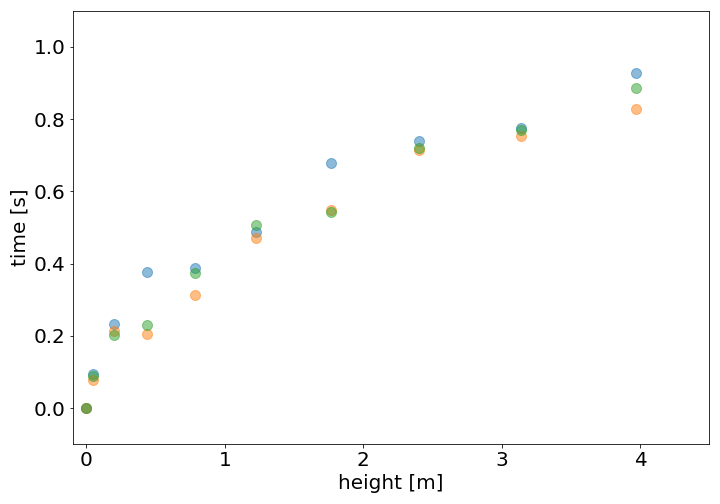

In [9]:
from IPython.display import Image
Image('images/falling_object.png', width=500)

For each height we have three measurements of time, which sligthly varies from one experiment to the next. Each of the dots can be represented as a coordinate $(d_i, t_i)$ where here the x-axis is the height and the y-axis time.

Now we can take two very different routes. In the first one, the classical one, we try to come up with a rational model that takes into account our data but also what we know about the world and physics. This is what Galileo did by noticing that the distance traveled during each additional unit of time closely followed the rule of the sum of odd numbers, resulting in a quadratic relation between $t$ and $d$ (remember that following Newton $d=\frac{1}{2}gt^2$):

| $$t$$ | $$d$$ |
| :-: | :-----------------------------------: |
| $1$  | $1=1^2$|
| $2$  | $1+3=2^2$|
| $3$  | $1+3+5=3^2$|
| $4$  | $1+3+5+7=4^2$|

While based on the collected data, the relation comes from a reasoning and assumptions such as that the object weight or the unit of time is not relevant.

In contrast, one could take a more general route and assume that $t$ and $d$ are related to each other via a model that belong to a certain class of models. Of course one also makes some assumptions here to define the class. For example we can say that $t$ and $d$ are related via an exponent $b$ and a factor $a$ so that $t = a*d^b$. We can now pick any pairs of values $a$ and $b$ and compare them to our data. Here you can see two such possible models in red and purple:

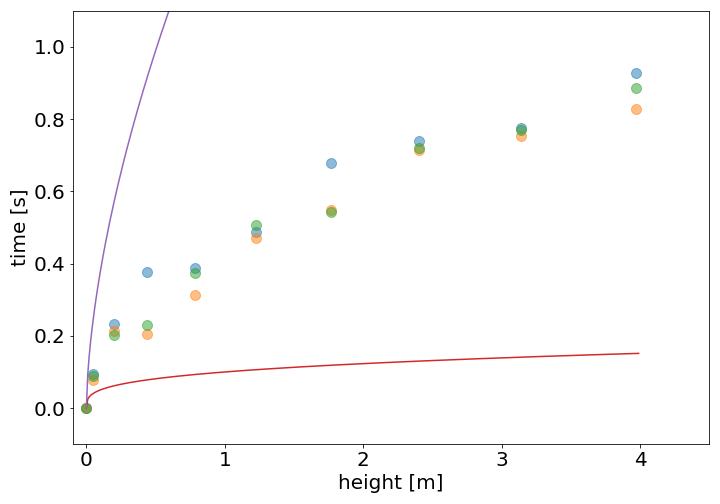

In [8]:
Image('images/falling_object_possible.png', width=500)

Obviously these choices are not optimal. We then numerically search for the parameters $a$ and $b$ which *optimize* the model to best describe the data. This is achieved by the ML method via a search in the parameter space which iteratively compares model prediction and available data and thereby **learns** from the data. This simple example contains all key elements of Machine Learning:
- a dataset
- a taks to achieve, here being able to *predict* $t$ for any $d$
- an ML model, here a regression with a function
- on optimization process to find the best solution

## How does a computer learn ?

In order to get a computer to learn from data, we need several ingredients. 

### Dataset 

First of all, we need enough and good data. We will see that these data can be of very different nature (tables, text, images etc.) but most of the time have been curated by humans. For example if we want to detect people in images, we need to first provide actual examples of images that contain humans as well as an indication of where they are in the image. In our example the data for time and distance had to be manually collected. Having enough data is also crucial. In our current example, imagine that we collected only two data points. Then we could simply connect to two points by a line producing an over-simplified model.

### Evaluating the model: metrics

As the computer explores potential models, it needs a way to distinguish good from bad models. This is where we need a so-called *metric*, a number that summarizes the accuracy of a model. For the kind of model we have used above where we try to find the best function $y = f(x)$ to describe 2D points $x_i$ and $y_i$, we can simply measure how far each point is from our model and sum those *errors*. For example the values predicted for $d_0$ is $t^{pred}_0 = f(d_0)$, and the error is $(t^{pred}_0 - t_0)^2$ (the square makes it worth to be far away from the actual value). We compute this error for all $N$ points in our dataset and sum them up so that the error called Residual Sum of Squares (RSS) is $(t^{pred}_0 - t_0)^2 + (t^{pred}_1 - t_1)^2 + ... + (t^{pred}_N - t_N)^2$. The smaller the RSS, the best our model $f$ is. But how do we find this model that gives the smallest RSS?

### Finding an optimum

The class of models that we proposed above was $f(t) = a*t^b$. In other words the task is to find the best $a$ and $b$ values to describe our data. The naive solution is to try all possible values within a certain range. In other words, we could make a grid of $a$ and $b$ values and try them all. Theoretically this works but it becomes quickly unfeasible as the number of parameters increases. Instead one can compute the error for a given choice $a_0$ and $b_0$ and from that choice ask: in which direction should I move (larger or smaller $a$'s and $b$'s) to decrease the error? This can be done by measuring the local "slope". Indeed we can imagine the following plot: if we could compute the error for all values of $a$ and $b$, we could draw a topographical landscape where for each coordinate $a$, $b$ the height represents the error. In such a drawing a mountain is a bad model and the lowest point is the best model (smallest error). This is illustrated in the following figure. On the left we see a 2D plot of the error depending on the values of $a$ and $b$, red meaning large error and blue small error. The optimal value (which corresponds to the equation $t = \sqrt{\frac{2}{g}}d^{0.5}$) is indicated with a red dot. On the right we see the same plot, but now in addition, we show the error as an elevation: the mountain is shown in red and the valley, which contains the optimum, in blue.

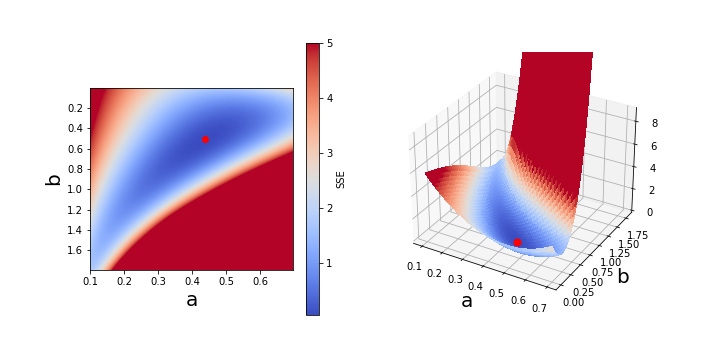

In [5]:
Image('images/falling_object_error.png', width=600)

If the landscape is not too rough we could hope to reach the lowest point (red dot) by just descending from a mountain following the steepest path. In other words, after every step taken, we can measure the slope around us and just move in the direction of steepest slope (just like a rolling ball would do). This is exactly what is done in most optimization methods: the slope is called the *gradient* and the minimum (best model parameters) is found by iteratively following the steepest gradient. Of course there are variations e.g. in how the slope is computed, how big each step is, if some randomness is added to the process etc. but the basic idea remains the same. This is true even for advanced methods like Deep Learning. The only change is that the landscape shown above is much more complex and can't be drawn as it has many more dimensions. Finally we would converge on our optimal model with $a=0.45$ and $b=0.5$:

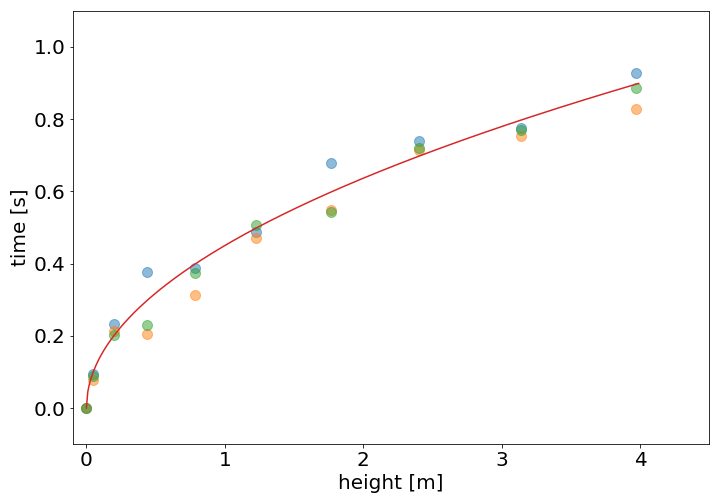

In [10]:
Image('images/falling_object_best.png', width=600)

## Variety in Machine Learning

As mentioned earlier, ML is a vast field that covers many different techniques and many different types of inputs and outputs.

### Input complexity and types

First the data the are processed by ML can be of different complexities. If we come back to our falling-object example, we had only two variables, time and distance. However in many cases, we have many more variables to analyze. For example in this dataset about wine quality (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009) we have a lot more information:

In [14]:
import pandas as pd
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In this case we might want to predict the quality of a wine based on all these characteristics and we would be dealing with many more dimensions than two.

As mentioned previously, data can also come in very different types such as images, text, time-series etc. Here as well datasets can come in various complexities. For images for example we might be dealing with simples natural images (images that you take with your phone for example), or we could be dealing with highly compelex scientific images acquired as volumes, in multiple channels etc.

### Model complexity and types

The ML models themselves are of various types and complexities. In our example the mode model was defined as the family of equations $d = a*b^t$ and we optimized for $a$ and $b$. However the class of models can be arbitrarily complex. We could for example have considered the family $d = a*t^b + c*t^d + e*t^f + ...$ This variable model complexity applies to most ML methods that we are going to survey, from the simplest ones to the most complex: a neural network can for example have 10 parameters to optimize but it can also have billions!

## What can ML models do?

We have seen above one example of ML where based on a dataset we wanted to define a function that would accurately describe the data and allow us to do predictions. This is called a regression, more precisely linear regression and is one of the simplest ML methods (the boundary between what is and is not ML is a gray area). However ML models can do much more than this. We give here a few examples but first make a distinction between two broad families of techniques: unsupervised and supervised. 

### Unsupervised vs. supervised methods

Let us take again the wine dataset above as an example. A few hundred wines were tasted by specialists, given a grade (last columns ```quality```) and then their physico-chemical properties were measured. A *supervised* model would now typically allow us to use the properties to *predict* the quality. Here the quality is used as a *label* and the method is *supervised* because we tell the algorithm what it should learn by providing for each data point a pair of information (the properties) and a target (the quality). Another task that we could imagine is to identify groups of similarly tasting wines, for example to recommend them to customers. Here we only provide properties and maybe the number of groups that we want at the end, but we let the algorithm *discover* those groups, hence the task is unsupervised. One of the main difference between these two approaches is that the *labeling* requires careful manual curation by humans. In this case for example the grading of each wine. For large datasets (imagine if there were thousands of wines), the labeling can become a real limitation that precludes the usage of ML methods and one has to come back to some more "hand-crafted" method. Let us see now some applications of these two classes.

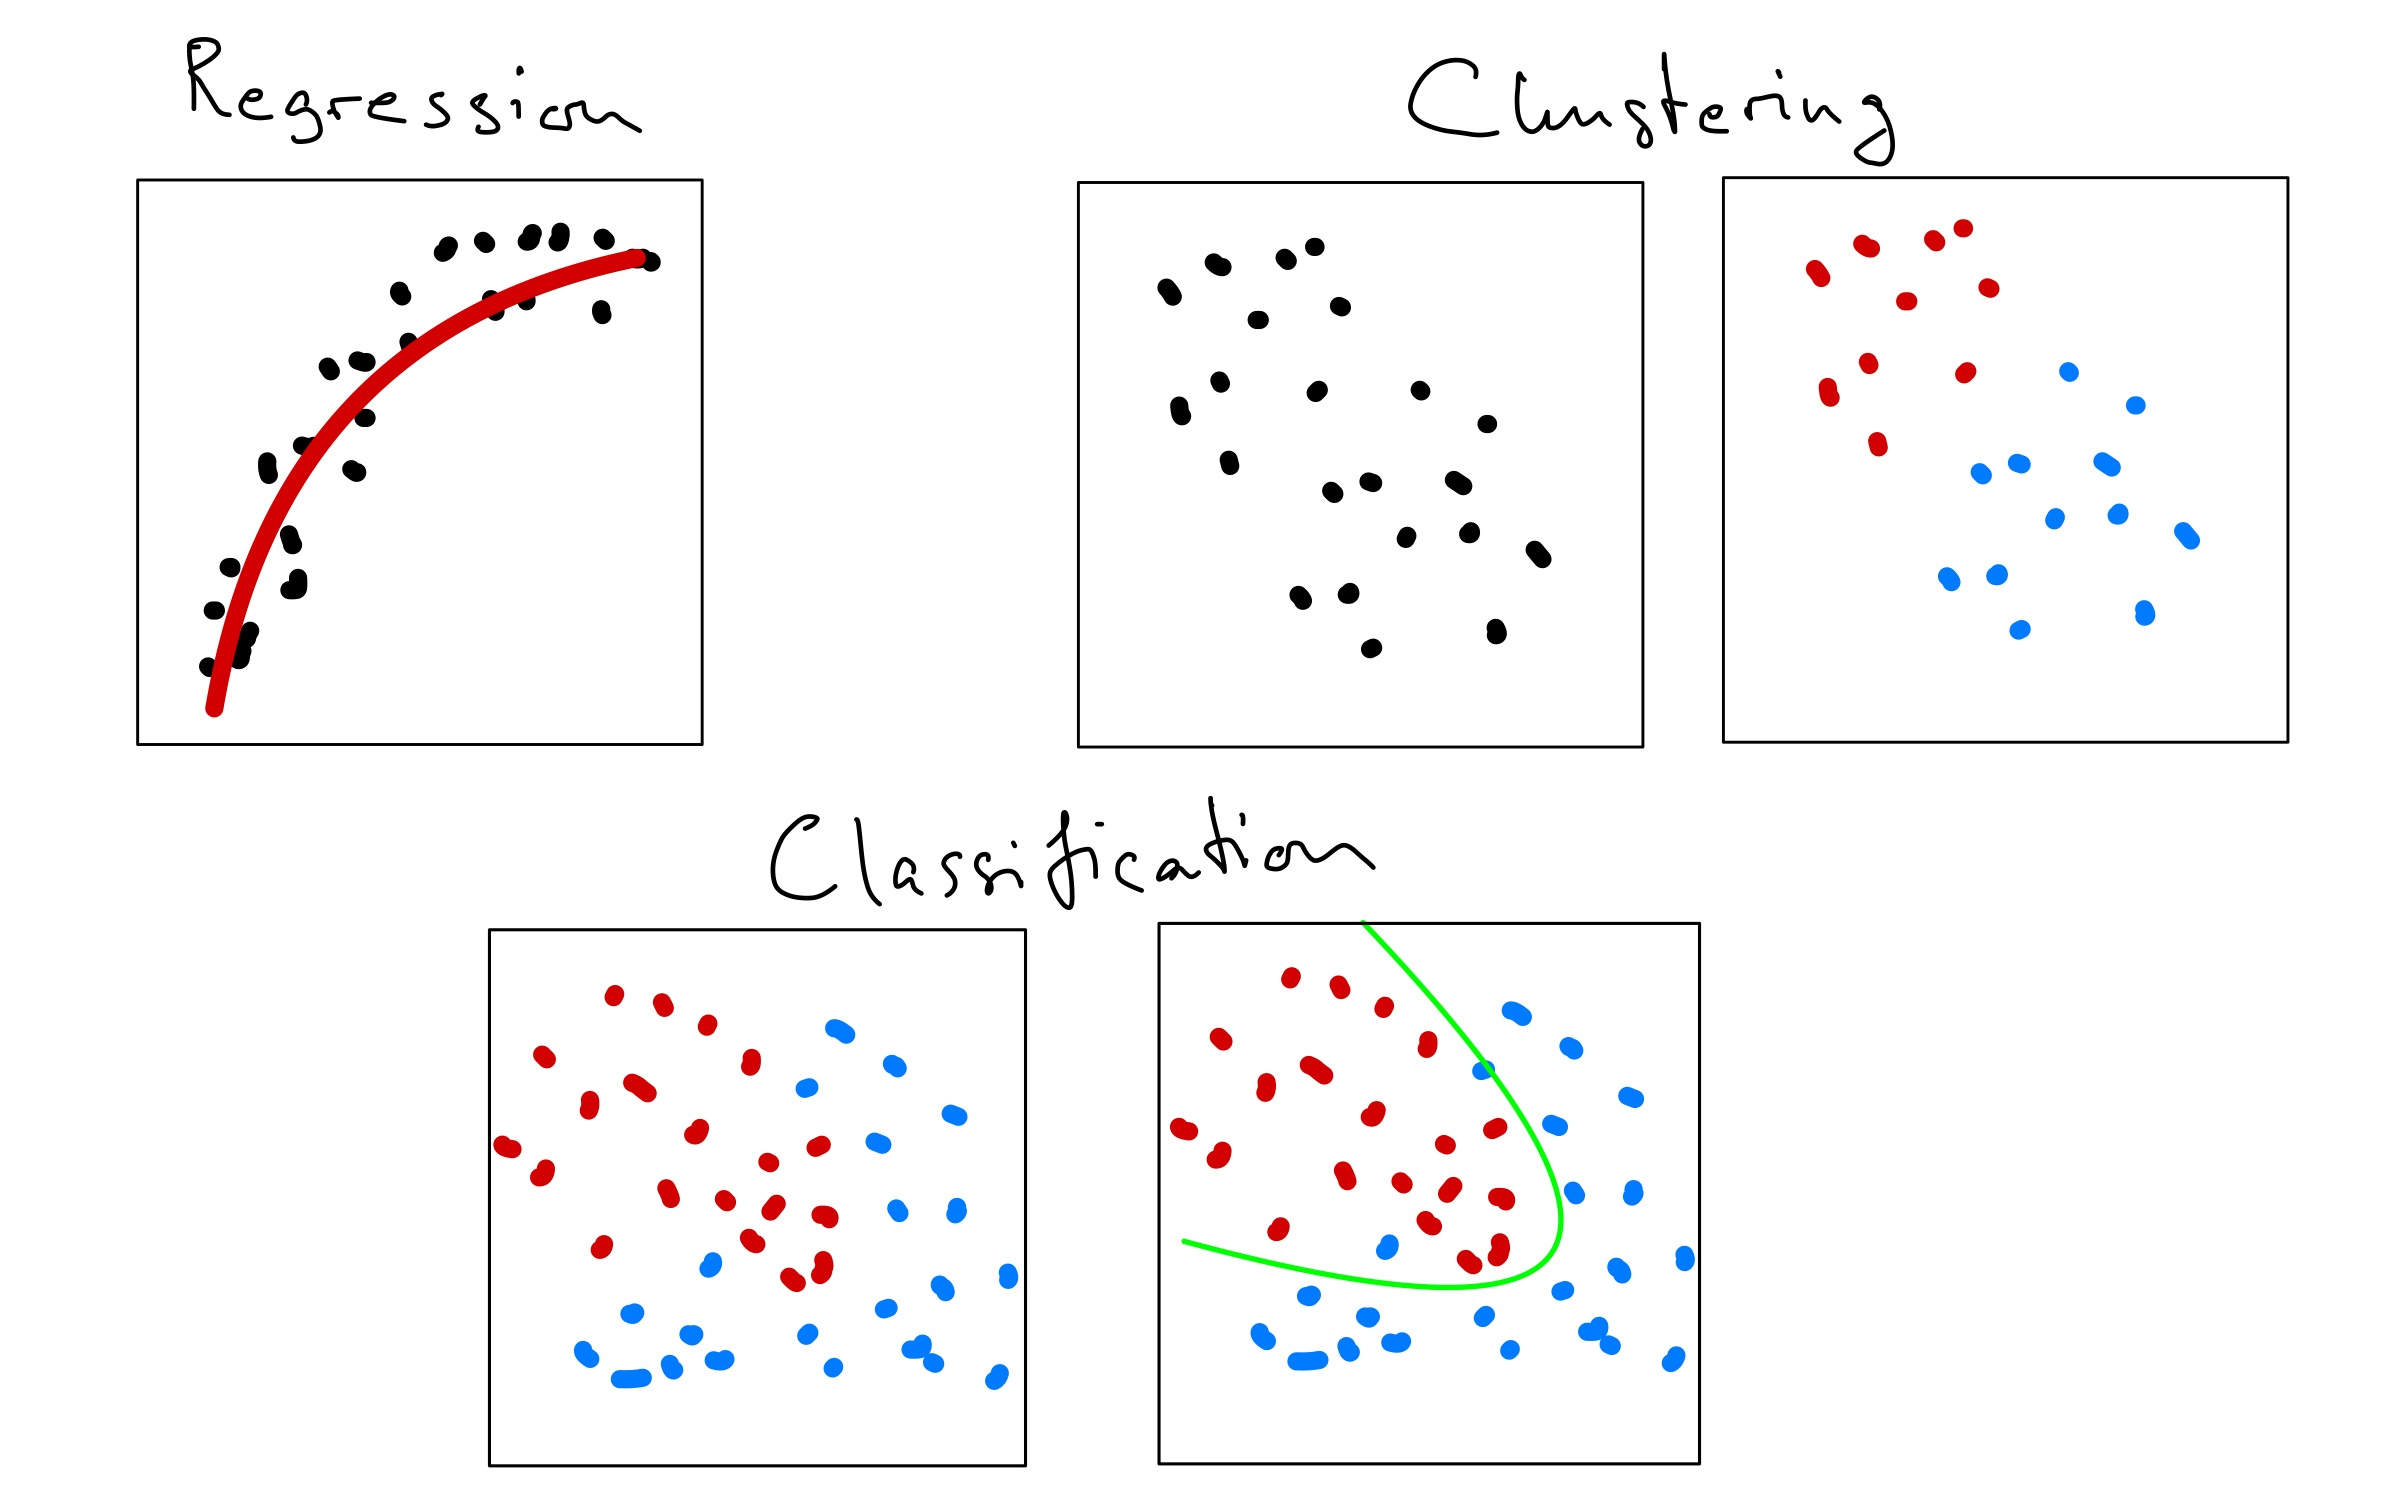

In [6]:
Image('images/tasks.jpeg', width=600)

### Clustering

In clustering we attempt to create groups of similar data within a dataset. This can be used to actually discover real underlying categories. For example you can imagine making measurements on living cells (size, shape etc.), create cluster based on that information, and discover that these classes actually correspond to some genetic mutation

### Classification

Classification is one of the main areas of Machine and Deep Learning. It involves learning to predict labels for given features, for example classifying wines into quality categories based on their properties. There are many methods to perform classification:
- logistic regression: this is a sort of equivalent to the linear regression presented above. Instead of predicting a continuous number (like time), logistic regression learns to predict or classify data in two or more categories.
- decision trees: these classifiers work by splitting a dataset into increasingly finer-grained categories based on their properties and essentially end-up being a sequence of binary questions that one can use to classify new data (for the wine data, such questions could be "does the wine have more or less than 12° alcohol?" or "does the wine have more or less than 0.6 volatile acidity" etc.). Trees are very useful as one can completely understand their "logic" in contrast to many other methods
- Support Vector Machines: this method allows to separate data points into categories that cannot be easily delimitated with simple lines or planes. This allows to disentangle very complex patterns where categories are tightly wound together
- Deep Learning: neural networks are composed of layers of interconnected nodes (neurons) where the outputs of neurons of one layer are combined as an input for neurons of a new layer and where the combination is "weighted" by parameters that can be trained. The initial input can be a series of properties (like in the wine dataset) but it can also be images, text etc. For images, one can for example attempt to classify images as containing cats or dogs, and for text, one can try to identify the sentiments in a text (is it sad, happy etc.)

### Segmentation

Segmentation is a task specific to image processing. It involves not just classifying for example an image as cat or dog, but to actually identify which pixels belong to a cat or a dog in an image. This can also be seen as a sort of classification but done at the pixel level and not the whole image level. Clustering, classification methods like decision trees as well as deep learning can be used for this task. In the case of clustering, one can for example use colors to create group of pixels and identify objects (imagine green trees in a city for example). Classification and deep learning work by filtering the image multiple times and using the filtered images as "features" to classify.

### Generation

Generation of data is specific to deep learning and can be done for any kind of data, but it is mostly used for text and images. The idea is to train a network with many examples of images or texts of a certain style to be able then to generate *new* data that resembles those examples by adding some small variations.